In [1]:
#Download the cleaned data

!gdown 15d_dOUHjkSQb7BEicSDIDDh86kWLeMCP

Downloading...
From: https://drive.google.com/uc?id=15d_dOUHjkSQb7BEicSDIDDh86kWLeMCP
To: /content/loan_cleaned_file.csv
100% 16.3M/16.3M [00:00<00:00, 48.1MB/s]


In [2]:
# libraries to analyze data
import numpy as np
import pandas as pd

# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 6)})
# libraries to perform stats
import scipy.stats as stats

import warnings
# Suppress all FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)
# Ignore only UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# Read the data from a csv file
loan_clnd_df = pd.read_csv("/content/loan_cleaned_file.csv")

In [4]:
loan_clnd_df.shape

(148668, 19)

In [5]:
loan_clnd_df.head()

,Unnamed: 0,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status
0,0,cf,Sex Not Available,type1,p1,nob/c,116500,4.2500,0.00,118000.0,pr,1740.0,EXP,758,CIB,25-34,98.728814,south,1
1,1,cf,Male,type2,p1,b/c,206500,3.9325,873.08,208000.0,pr,4980.0,EQUI,552,EXP,55-64,99.278846,North,1
2,2,cf,Male,type1,p1,nob/c,406500,4.5600,595.00,508000.0,pr,9480.0,EXP,834,CIB,35-44,80.019685,south,0
3,3,cf,Male,type1,p4,nob/c,456500,4.2500,1495.00,658000.0,pr,11880.0,EXP,587,CIB,45-54,69.376900,North,0
4,4,cf,Joint,type1,p1,nob/c,696500,4.0000,0.00,758000.0,pr,10440.0,CRIF,602,EXP,25-34,91.886544,North,0


In [6]:
loan_clnd_df.columns

Index(['Unnamed: 0', 'loan_limit', 'Gender', 'loan_type', 'loan_purpose',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Upfront_charges', 'property_value', 'occupancy_type', 'income',
       'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'LTV',
       'Region', 'Status'],
      dtype='object')

In [7]:
#Unnamed: 0 is a field which is just an index and drop the column

loan_clnd_df = loan_clnd_df.drop('Unnamed: 0', axis=1)

In [ ]:
loan_clnd_df.head()

,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status
0,cf,Sex Not Available,type1,p1,nob/c,116500,4.2500,0.00,118000.0,pr,1740.0,EXP,758,CIB,25-34,98.728814,south,1
1,cf,Male,type2,p1,b/c,206500,3.9325,873.08,208000.0,pr,4980.0,EQUI,552,EXP,55-64,99.278846,North,1
2,cf,Male,type1,p1,nob/c,406500,4.5600,595.00,508000.0,pr,9480.0,EXP,834,CIB,35-44,80.019685,south,0
3,cf,Male,type1,p4,nob/c,456500,4.2500,1495.00,658000.0,pr,11880.0,EXP,587,CIB,45-54,69.376900,North,0
4,cf,Joint,type1,p1,nob/c,696500,4.0000,0.00,758000.0,pr,10440.0,CRIF,602,EXP,25-34,91.886544,North,0


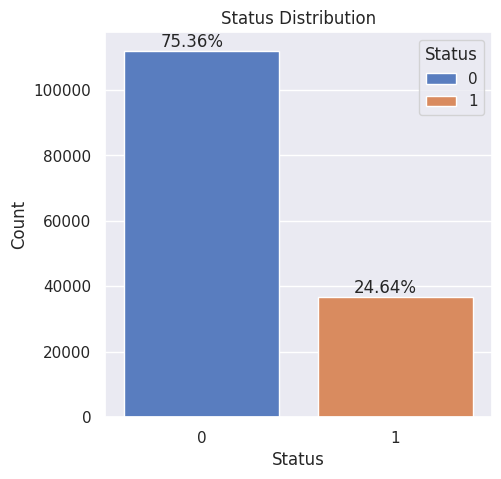

In [ ]:
# ax = loan_clnd_df.Status.value_counts().plot(kind='bar', color='skyblue')
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=loan_clnd_df, x='Status', hue='Status', palette='muted')
# Adding labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Status Distribution')
# Calculate the percentages
total = len(loan_clnd_df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than 0
        percentage = '{:.2f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

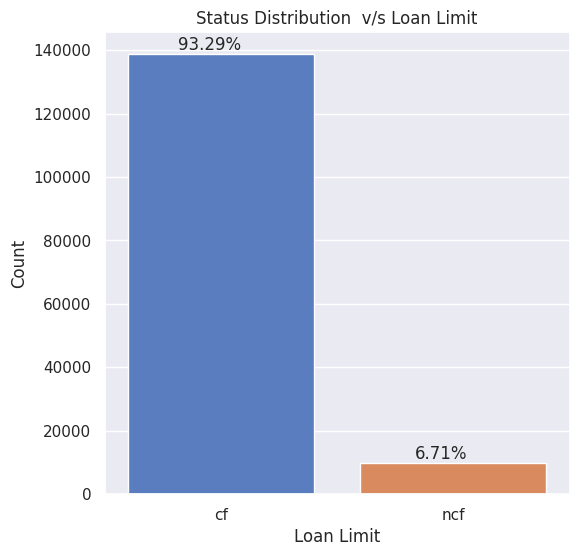

In [ ]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=loan_clnd_df, x='loan_limit',  palette='muted')
# Adding labels and title
plt.xlabel('Loan Limit')
plt.ylabel('Count')
plt.title('Status Distribution  v/s Loan Limit')
# Calculate the percentages
total = len(loan_clnd_df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than 0
        percentage = '{:.2f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

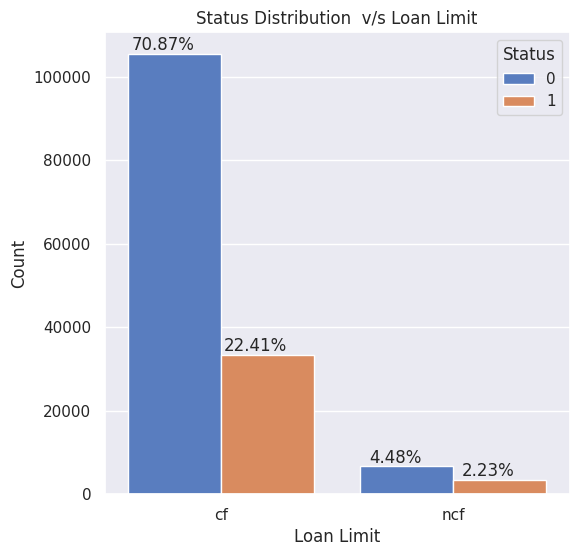

In [ ]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=loan_clnd_df, x='loan_limit', hue='Status', palette='muted')
# Adding labels and title
plt.xlabel('Loan Limit')
plt.ylabel('Count')
plt.title('Status Distribution  v/s Loan Limit')
# Calculate the percentages
total = len(loan_clnd_df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than 0
        percentage = '{:.2f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

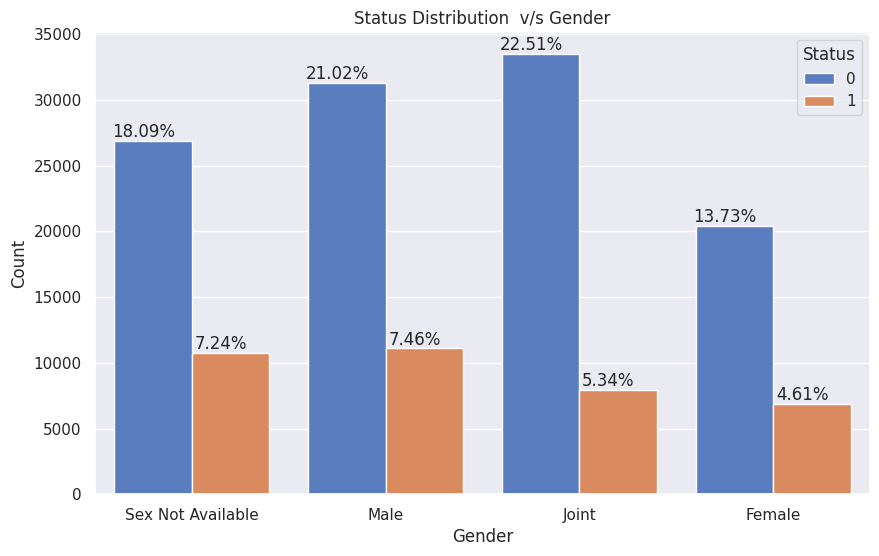

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=loan_clnd_df, x='Gender', hue='Status', palette='muted')
# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Status Distribution  v/s Gender')
# Calculate the percentages
total = len(loan_clnd_df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than 0
        percentage = '{:.2f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

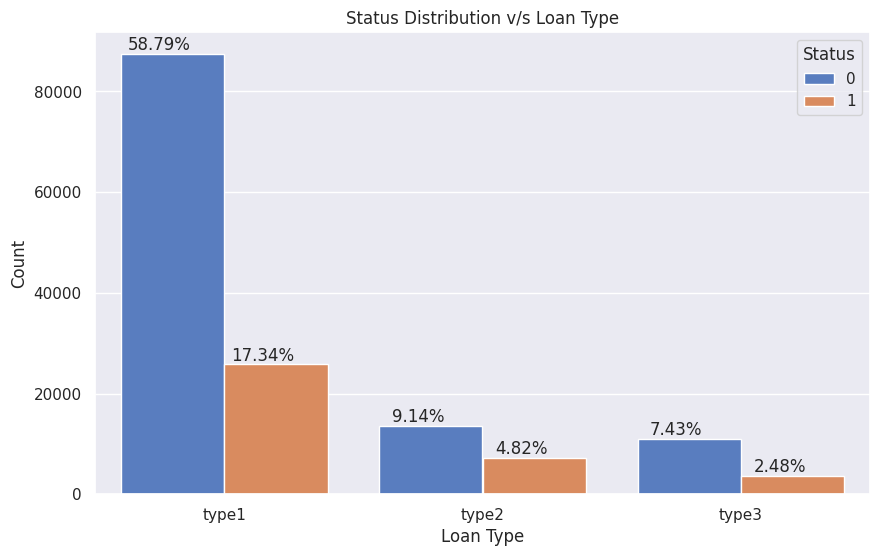

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=loan_clnd_df, x='loan_type', hue='Status', palette='muted')
# Adding labels and title
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.title('Status Distribution v/s Loan Type')
# Calculate the percentages
total = len(loan_clnd_df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than 0
        percentage = '{:.2f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

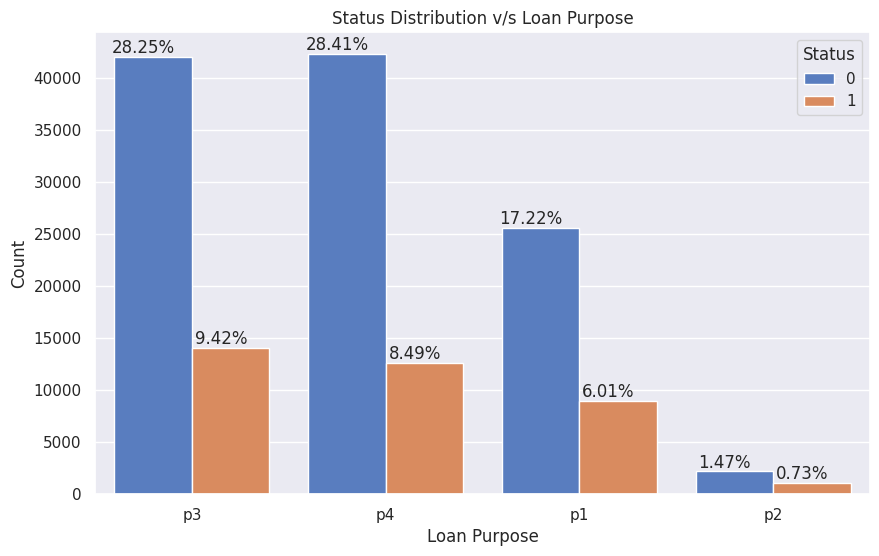

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=loan_clnd_df, x='loan_purpose', order=loan_clnd_df['loan_purpose'].value_counts().index, hue='Status', palette='muted')
# Adding labels and title
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Status Distribution v/s Loan Purpose')
# Calculate the percentages
total = len(loan_clnd_df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than 0
        percentage = '{:.2f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

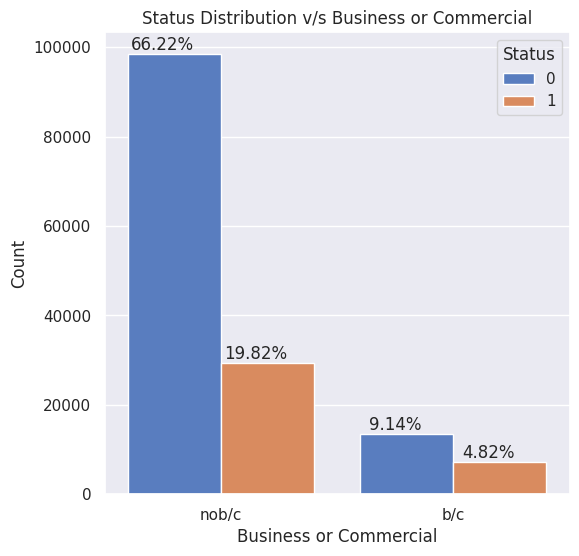

In [ ]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=loan_clnd_df, x='business_or_commercial', order=loan_clnd_df['business_or_commercial'].value_counts().index, hue='Status', palette='muted')
# Adding labels and title
plt.xlabel('Business or Commercial')
plt.ylabel('Count')
plt.title('Status Distribution v/s Business or Commercial')
# Calculate the percentages
total = len(loan_clnd_df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than 0
        percentage = '{:.2f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

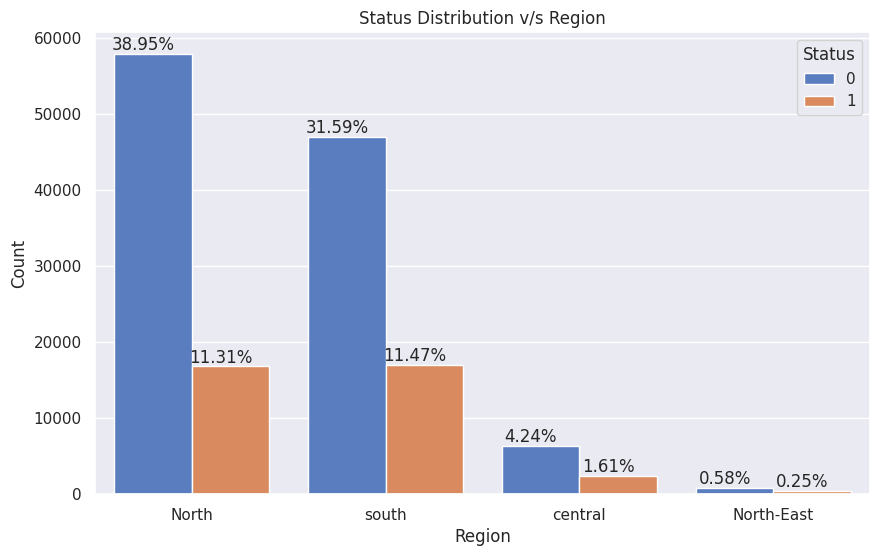

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=loan_clnd_df, x='Region', order=loan_clnd_df['Region'].value_counts().index, hue='Status', palette='muted')
# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Status Distribution v/s Region')
# Calculate the percentages
total = len(loan_clnd_df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than 0
        percentage = '{:.2f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

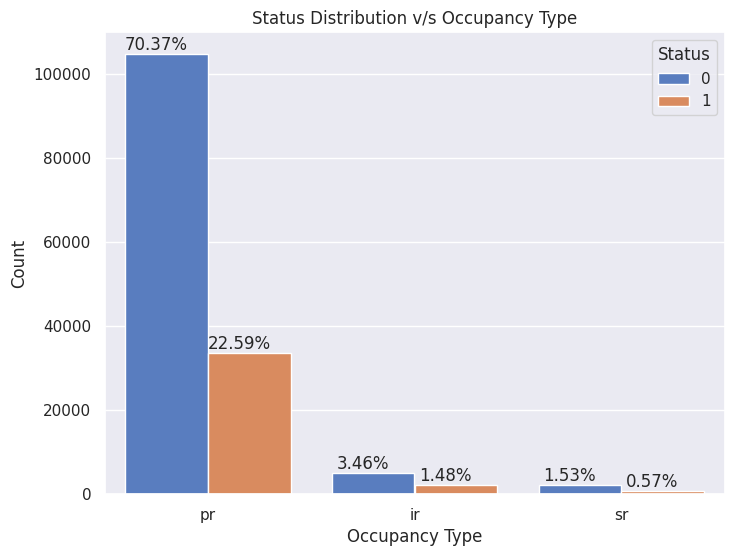

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=loan_clnd_df, x='occupancy_type', order=loan_clnd_df['occupancy_type'].value_counts().index, hue='Status', palette='muted')
# Adding labels and title
plt.xlabel('Occupancy Type')
plt.ylabel('Count')
plt.title('Status Distribution v/s Occupancy Type')
# Calculate the percentages
total = len(loan_clnd_df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than 0
        percentage = '{:.2f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

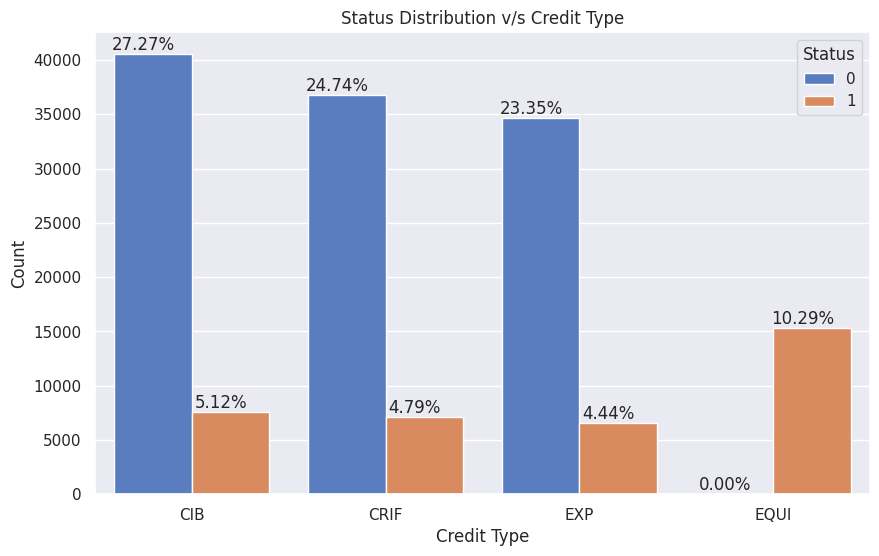

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=loan_clnd_df, x='credit_type', order=loan_clnd_df['credit_type'].value_counts().index, hue='Status', palette='muted')
# Adding labels and title
plt.xlabel('Credit Type')
plt.ylabel('Count')
plt.title('Status Distribution v/s Credit Type')
# Calculate the percentages
total = len(loan_clnd_df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than 0
        percentage = '{:.2f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

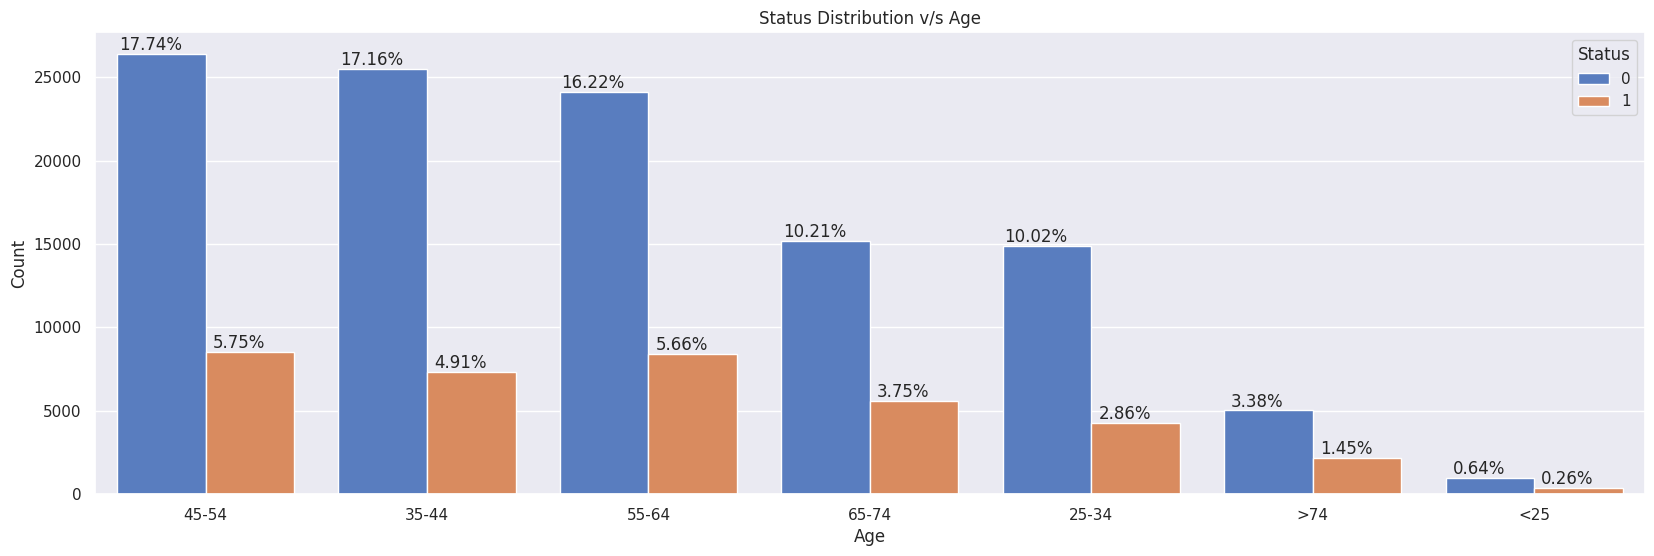

In [ ]:
ax = sns.countplot(data=loan_clnd_df, x='age', order=loan_clnd_df['age'].value_counts().index, hue='Status', palette='muted')
# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Status Distribution v/s Age')
# Calculate the percentages
total = len(loan_clnd_df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than 0
        percentage = '{:.2f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

In [ ]:
# Create bins for credit score ranges
bins = [500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900]
labels = ['500-520', '520-540', '540-560', '560-580', '580-600','600-620', '620-640', '640-660', '660-680', '680-700',
          '700-720', '720-740', '740-760', '760-780', '780-800','800-820', '820-840', '840-860', '860-880', '880-900']
loan_clnd_df['Credit_Score_Range'] = pd.cut(loan_clnd_df['Credit_Score'], bins=bins, labels=labels, right=False)

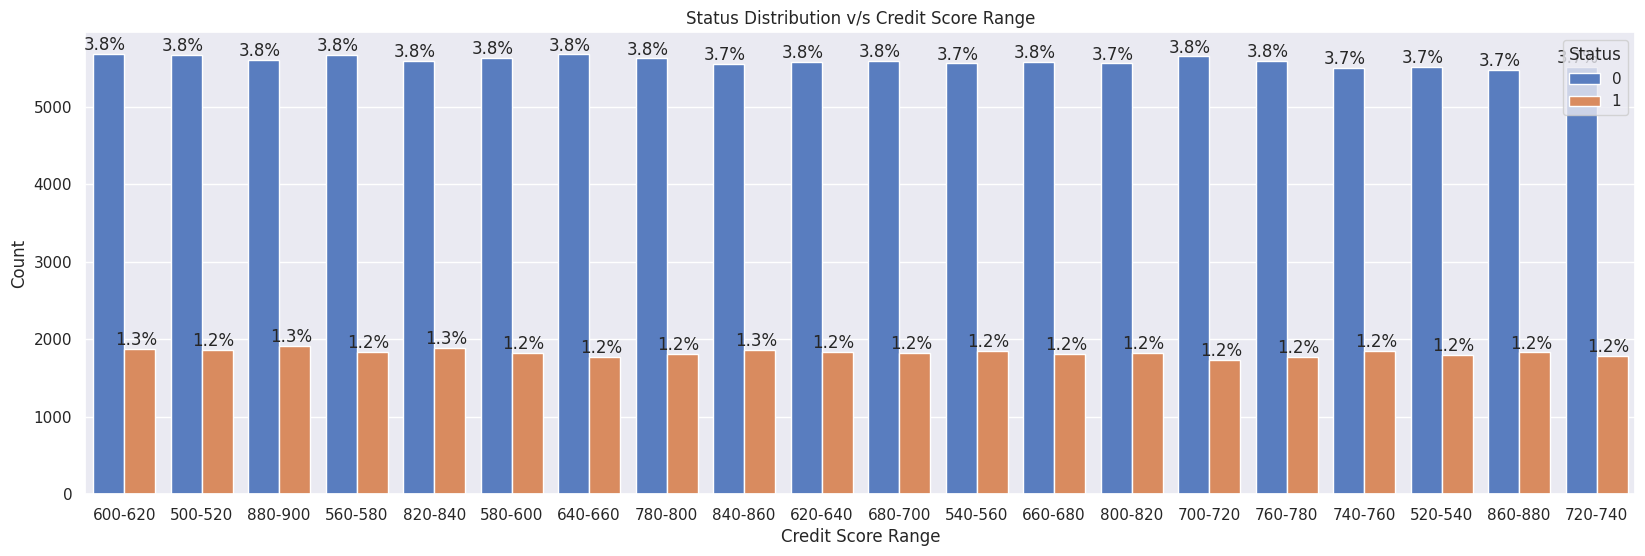

In [ ]:
ax = sns.countplot(data=loan_clnd_df, x='Credit_Score_Range', order=loan_clnd_df['Credit_Score_Range'].value_counts().index, hue='Status', palette='muted')
# Adding labels and title
plt.xlabel('Credit Score Range')
plt.ylabel('Count')
plt.title('Status Distribution v/s Credit Score Range')
# Calculate the percentages
total = len(loan_clnd_df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than 0
        percentage = '{:.1f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

In [ ]:
# Create bins for credit score ranges
bins2 = [500, 540, 580, 620, 660, 700, 740, 780, 820, 860, 900]
labels2 = ['500-540', '540-580', '580-620', '620-660', '660-700',
          '700-740', '740-780', '780-820', '820-860', '860-900']
loan_clnd_df['Credit_Score_Range_2'] = pd.cut(loan_clnd_df['Credit_Score'], bins=bins2, labels=labels2, right=False)

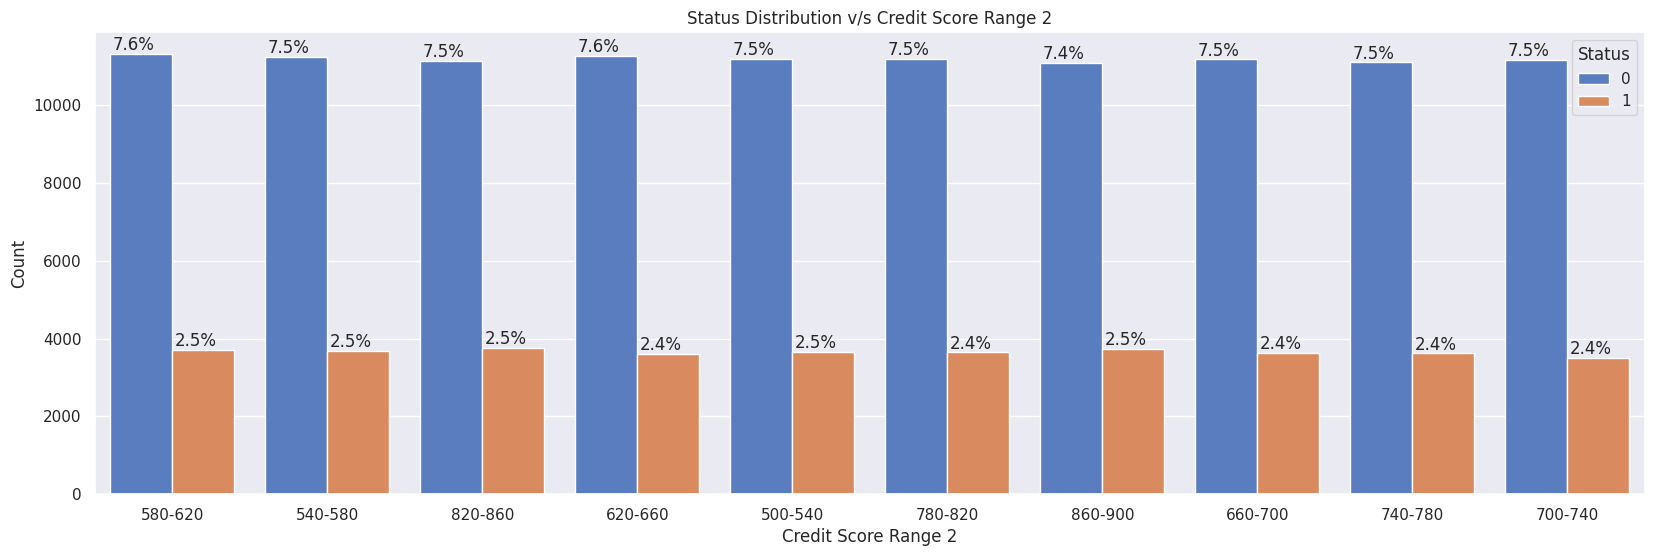

In [ ]:
ax = sns.countplot(data=loan_clnd_df, x='Credit_Score_Range_2', order=loan_clnd_df['Credit_Score_Range_2'].value_counts().index, hue='Status', palette='muted')
# Adding labels and title
plt.xlabel('Credit Score Range 2')
plt.ylabel('Count')
plt.title('Status Distribution v/s Credit Score Range 2')
# Calculate the percentages
total = len(loan_clnd_df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than 0
        percentage = '{:.1f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

In [ ]:
loan_clnd_df['loan_amount'].describe()

,loan_amount
count,1.486680e+05
mean,3.311192e+05
std,1.839101e+05
min,1.650000e+04
25%,1.965000e+05
50%,2.965000e+05
75%,4.365000e+05
max,3.576500e+06


##Numerical Columns - Visualization

In [ ]:
def plot_boxplots_by_status(df, num_cols):
    """
    Plot box plots for numeric columns against the default status.
    """
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    axes = axes.flat

    for i, col in enumerate(num_cols):
        sns.boxplot(x=df["Status"], y=df[col], ax=axes[i], hue=df["Status"])
        axes[i].set_title(f"{col} by Status", fontsize=10, fontweight="bold")

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_boxplots(df, num_cols):
    """
    Plot box plots for numeric columns against the default status.
    """
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    axes = axes.flat

    for i, col in enumerate(num_cols):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f"{col} box plot", fontsize=10, fontweight="bold")

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_numeric_distributions(df, num_cols):
    """
    Plot histograms for numeric columns to visualize their distribution.
    """
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
    axes = axes.flat

    for i, col in enumerate(num_cols):
        sns.histplot(df, x=col, stat="count", kde=True, line_kws={"linewidth": 2.0},
                     alpha=0.4, color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"], ax=axes[i])
        sns.rugplot(df, x=col, color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"], ax=axes[i])
        axes[i].set_title(f"{col}", fontsize=10, fontweight="bold", color="darkred")

    plt.tight_layout()
    plt.show()

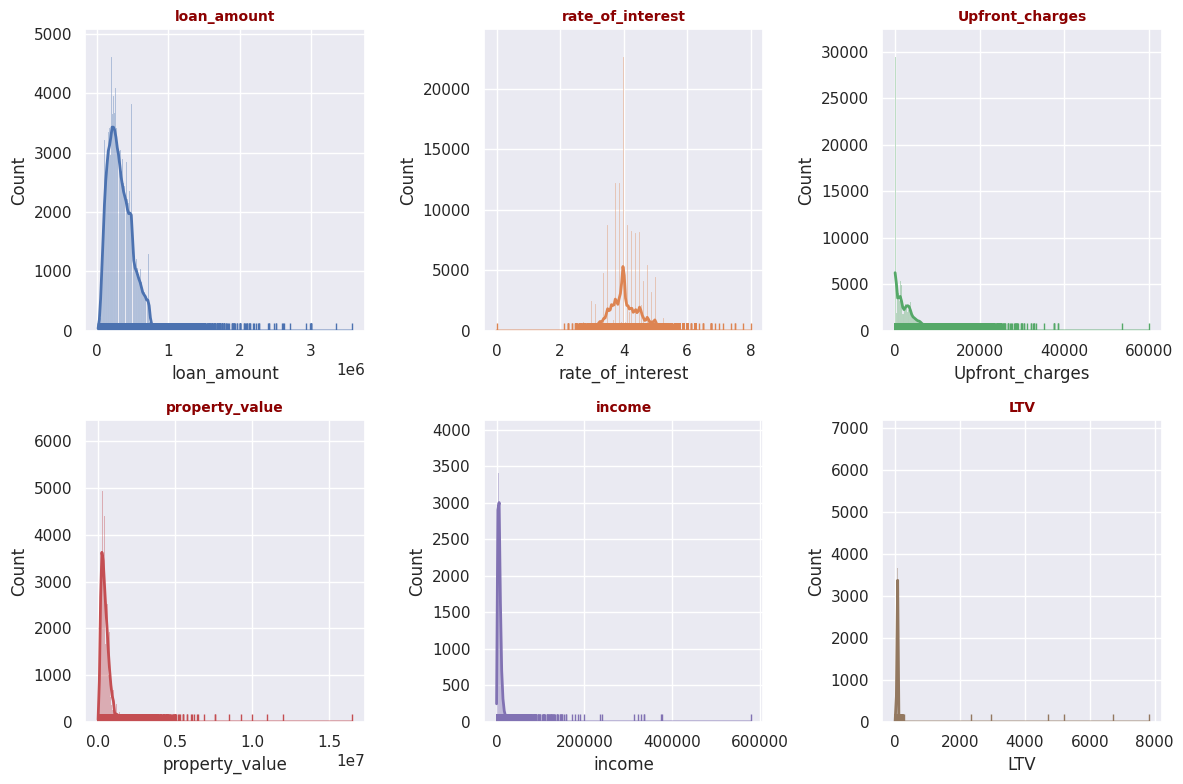

In [ ]:
plot_numeric_distributions(loan_clnd_df, ['loan_amount', 'rate_of_interest',
       'Upfront_charges', 'property_value', 'income', 'LTV'])

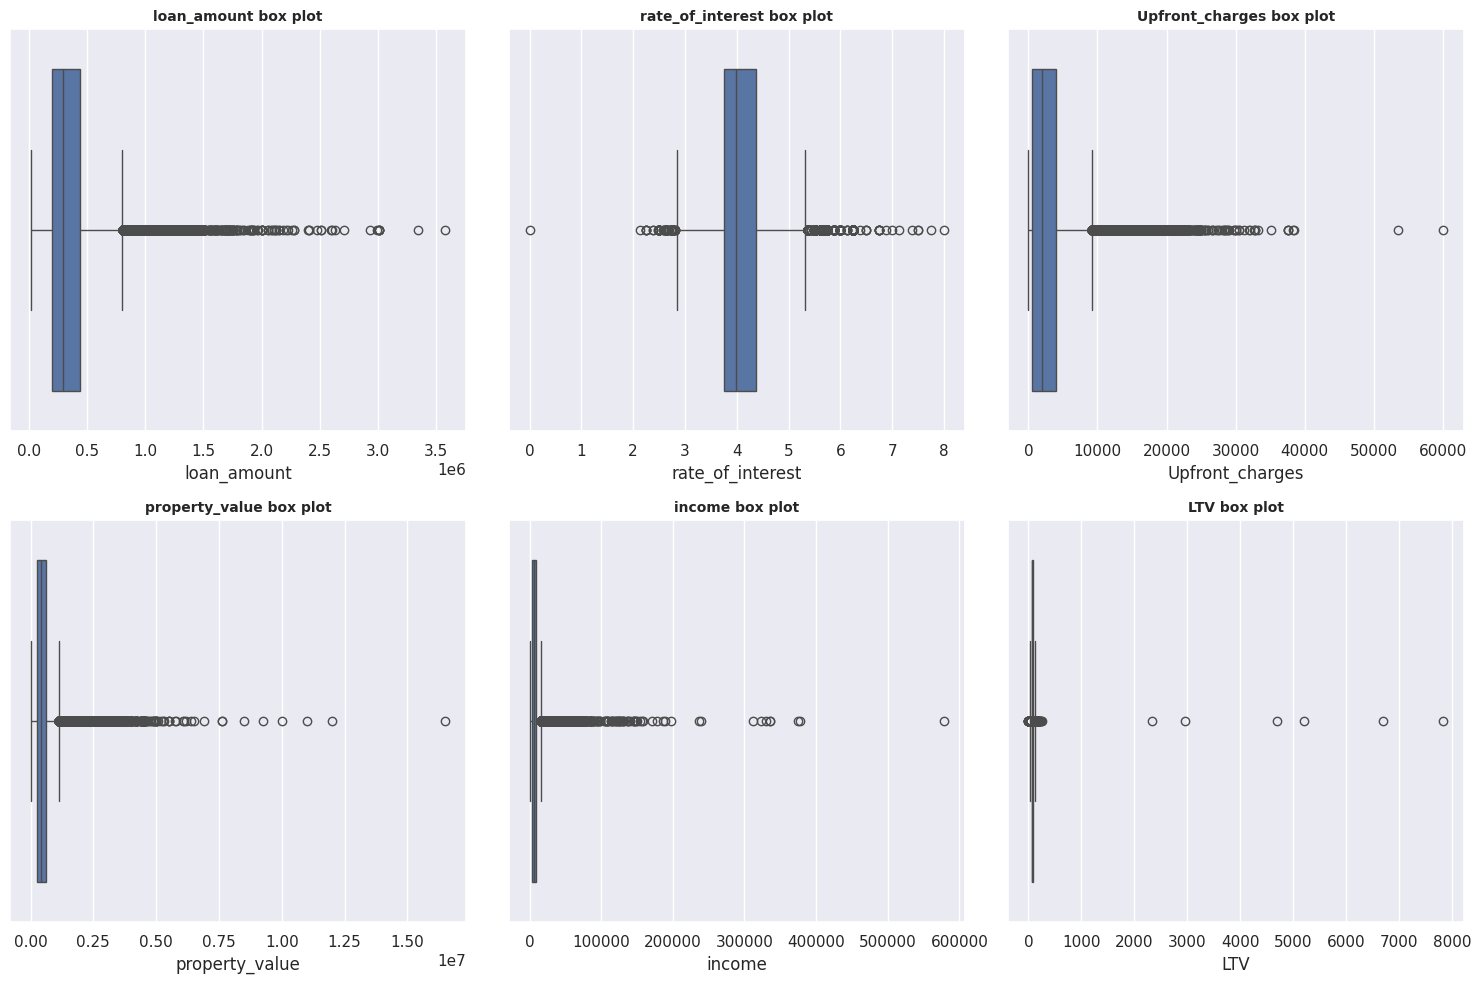

In [ ]:
plot_boxplots(loan_clnd_df, ['loan_amount', 'rate_of_interest',
       'Upfront_charges', 'property_value', 'income', 'LTV'])

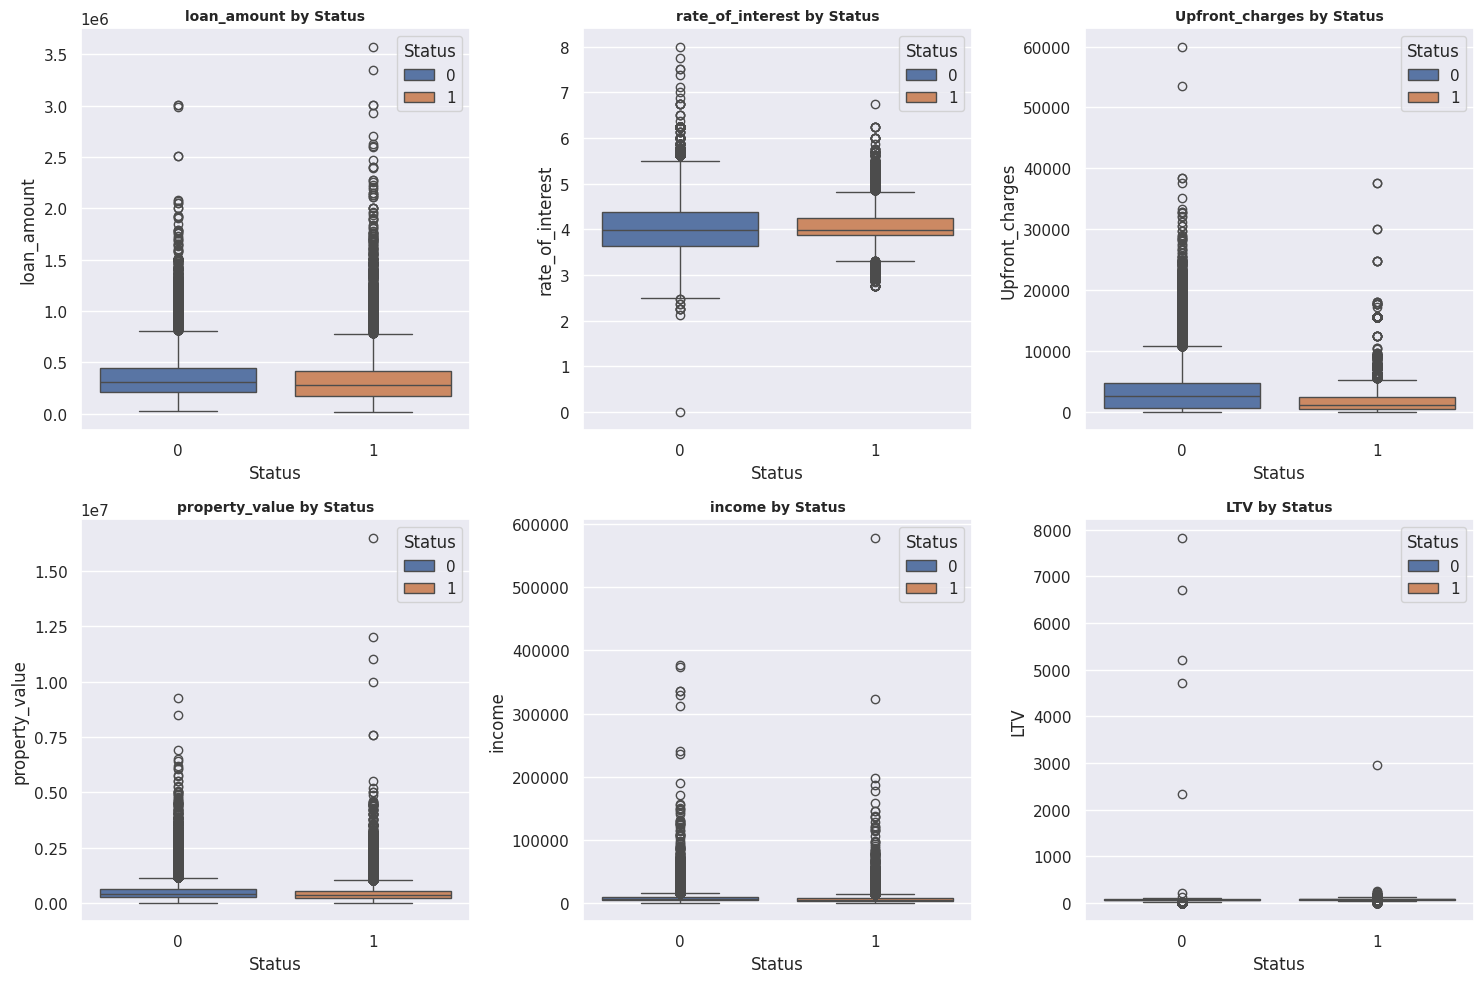

In [ ]:
plot_boxplots_by_status(loan_clnd_df, ['loan_amount', 'rate_of_interest',
       'Upfront_charges', 'property_value', 'income', 'LTV'])

**Observation:**

By taking a look at Box plots and Hist Plots of all 6 numerical features suggests the presence of huge outliers in the data.

As data contains outliers, consider using a Robust Scaler, which scales the data according to the interquartile range, making it more robust to outliers.

**Robust Scaler**

 * **Range:** Scales the data according to the interquartile range (IQR), which is the range between the 25th percentile (Q1) and the 75th percentile (Q3).

 * **Use Case:** Ideal for datasets with outliers or when the data does not follow a normal distribution. It is particularly useful when you want to minimize the influence of outliers.

 * **Sensitivity:** Less sensitive to outliers compared to Min-Max Scaler and Standard Scaler because it uses the median and IQR instead of the mean and standard deviation.


**How It Works**

 * **Median Centering:** The data is centered around the median, which is a measure of central tendency that is less affected by outliers.

 * **Scaling by IQR:** The data is then scaled by the IQR, which reduces the impact of extreme values.

**When to Use Robust Scaler**

 * **Presence of Outliers:** When your dataset contains significant outliers that could skew the results of other scaling methods.

 * **Non-Normal Distribution:** When the data does not follow a normal distribution and you want to ensure that the scaling process is robust to the presence of outliers.

In [8]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

In [9]:
# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), ['loan_amount', 'rate_of_interest', 'Upfront_charges', 'property_value', 'income', 'LTV']),
        # No transformation for categorical columns
        ('cat', 'passthrough', ['loan_limit', 'Gender', 'loan_type', 'loan_purpose',
       'business_or_commercial', 'occupancy_type',
       'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age',
       'Region', 'Status'])
    ])

# Apply the transformations
loan_transformed_data = preprocessor.fit_transform(loan_clnd_df)

# Convert the transformed data back to a DataFrame for better readability
loan_transformed_df = pd.DataFrame(loan_transformed_data, columns=[
    'loan_amount_scaled', 'rate_of_interest_scaled', 'Upfront_charges_scaled', 'property_value_scaled', 'income_scaled', 'LTV_scaled',
    'loan_limit', 'Gender', 'loan_type', 'loan_purpose', 'business_or_commercial', 'occupancy_type',
    'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'Region', 'Status'
])

In [ ]:
loan_clnd_df.head()

,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status,Credit_Score_Range,Credit_Score_Range_2
0,cf,Sex Not Available,type1,p1,nob/c,116500,4.2500,0.00,118000.0,pr,1740.0,EXP,758,CIB,25-34,98.728814,south,1,740-760,740-780
1,cf,Male,type2,p1,b/c,206500,3.9325,873.08,208000.0,pr,4980.0,EQUI,552,EXP,55-64,99.278846,North,1,540-560,540-580
2,cf,Male,type1,p1,nob/c,406500,4.5600,595.00,508000.0,pr,9480.0,EXP,834,CIB,35-44,80.019685,south,0,820-840,820-860
3,cf,Male,type1,p4,nob/c,456500,4.2500,1495.00,658000.0,pr,11880.0,EXP,587,CIB,45-54,69.376900,North,0,580-600,580-620
4,cf,Joint,type1,p1,nob/c,696500,4.0000,0.00,758000.0,pr,10440.0,CRIF,602,EXP,25-34,91.886544,North,0,600-620,580-620


In [ ]:
loan_transformed_df.head()

,loan_amount_scaled,rate_of_interest_scaled,Upfront_charges_scaled,property_value_scaled,income_scaled,LTV_scaled,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,occupancy_type,credit_type,Credit_Score,co-applicant_credit_type,age,Region,Status
0,-0.75,0.416,-0.582675,-0.828571,-0.846154,0.948072,cf,Sex Not Available,type1,p1,nob/c,pr,EXP,758,CIB,25-34,south,1
1,-0.375,-0.092,-0.33127,-0.571429,-0.153846,0.970587,cf,Male,type2,p1,b/c,pr,EQUI,552,EXP,55-64,North,1
2,0.458333,0.912,-0.411344,0.285714,0.807692,0.182221,cf,Male,type1,p1,nob/c,pr,EXP,834,CIB,35-44,south,0
3,0.666667,0.416,-0.152187,0.714286,1.320513,-0.253438,cf,Male,type1,p4,nob/c,pr,EXP,587,CIB,45-54,North,0
4,1.666667,0.016,-0.582675,1.0,1.012821,0.667986,cf,Joint,type1,p1,nob/c,pr,CRIF,602,EXP,25-34,North,0


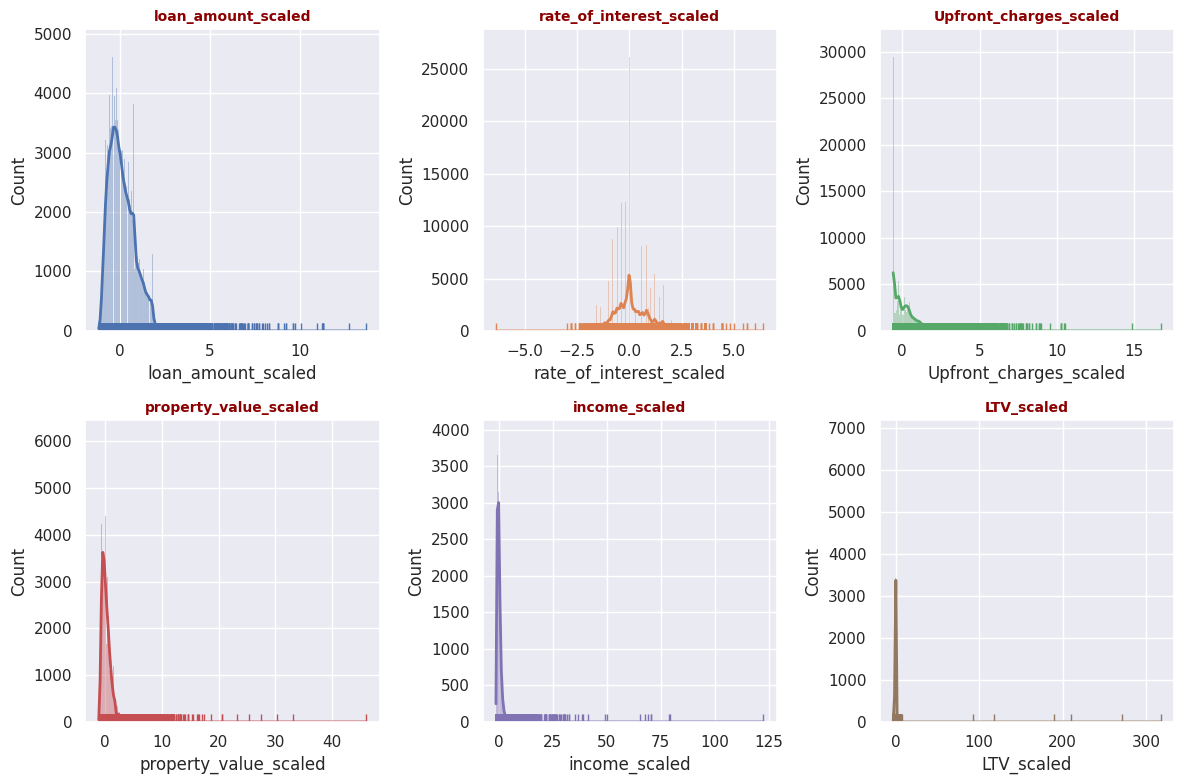

In [ ]:
plot_numeric_distributions(loan_transformed_df, ['loan_amount_scaled', 'rate_of_interest_scaled', 'Upfront_charges_scaled', 'property_value_scaled', 'income_scaled', 'LTV_scaled'])

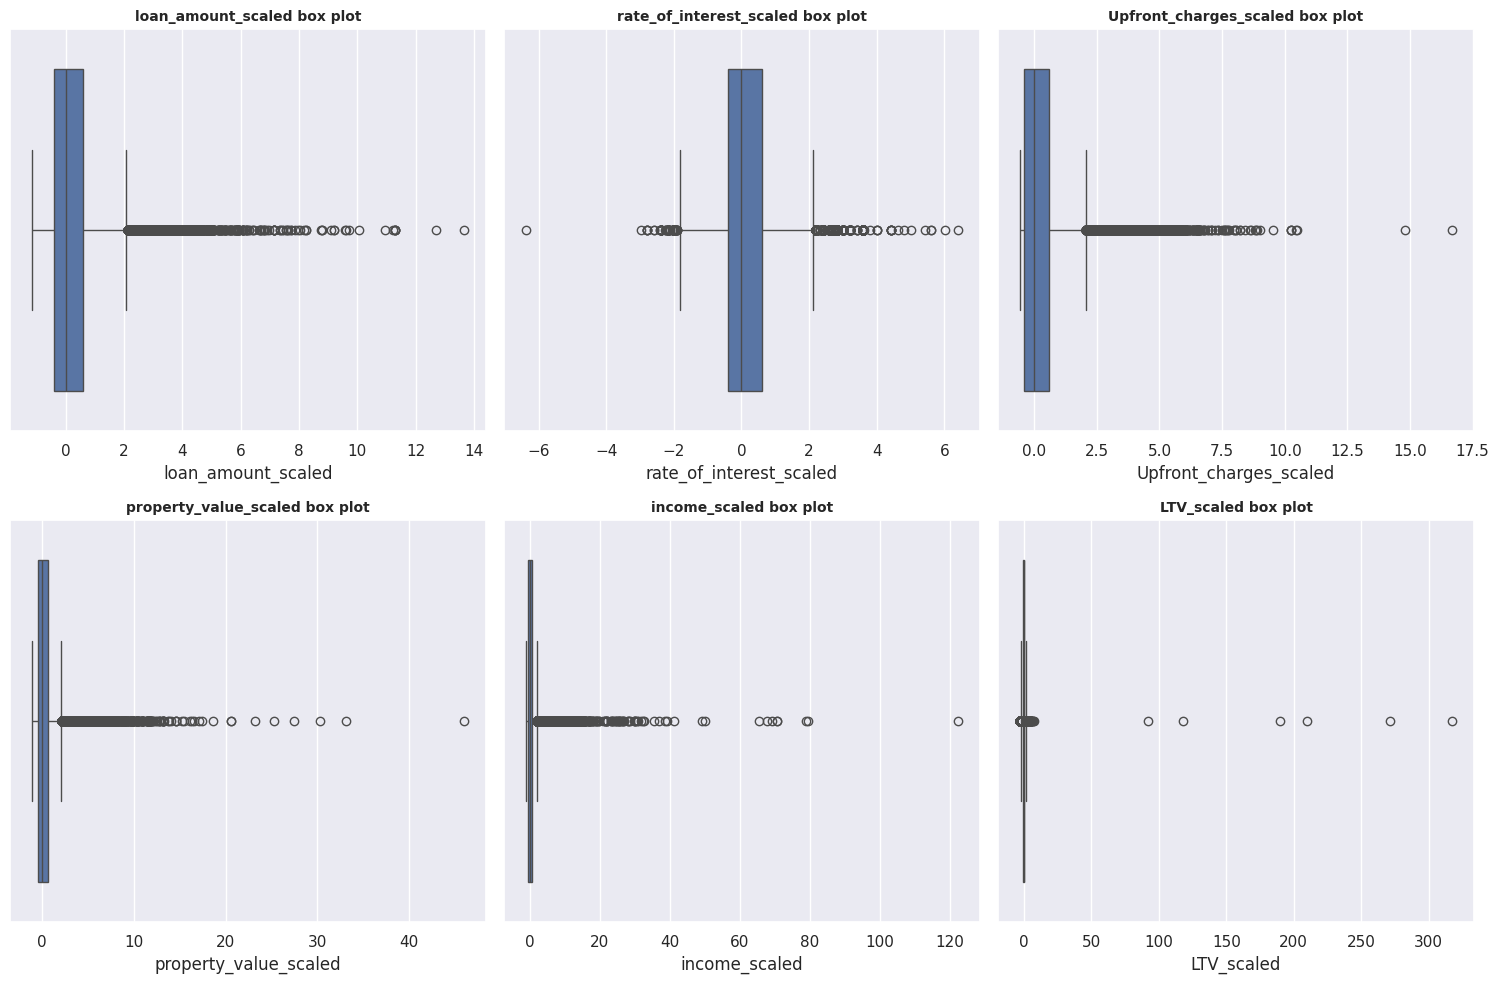

In [ ]:
plot_boxplots(loan_transformed_df, ['loan_amount_scaled', 'rate_of_interest_scaled', 'Upfront_charges_scaled', 'property_value_scaled', 'income_scaled', 'LTV_scaled'])

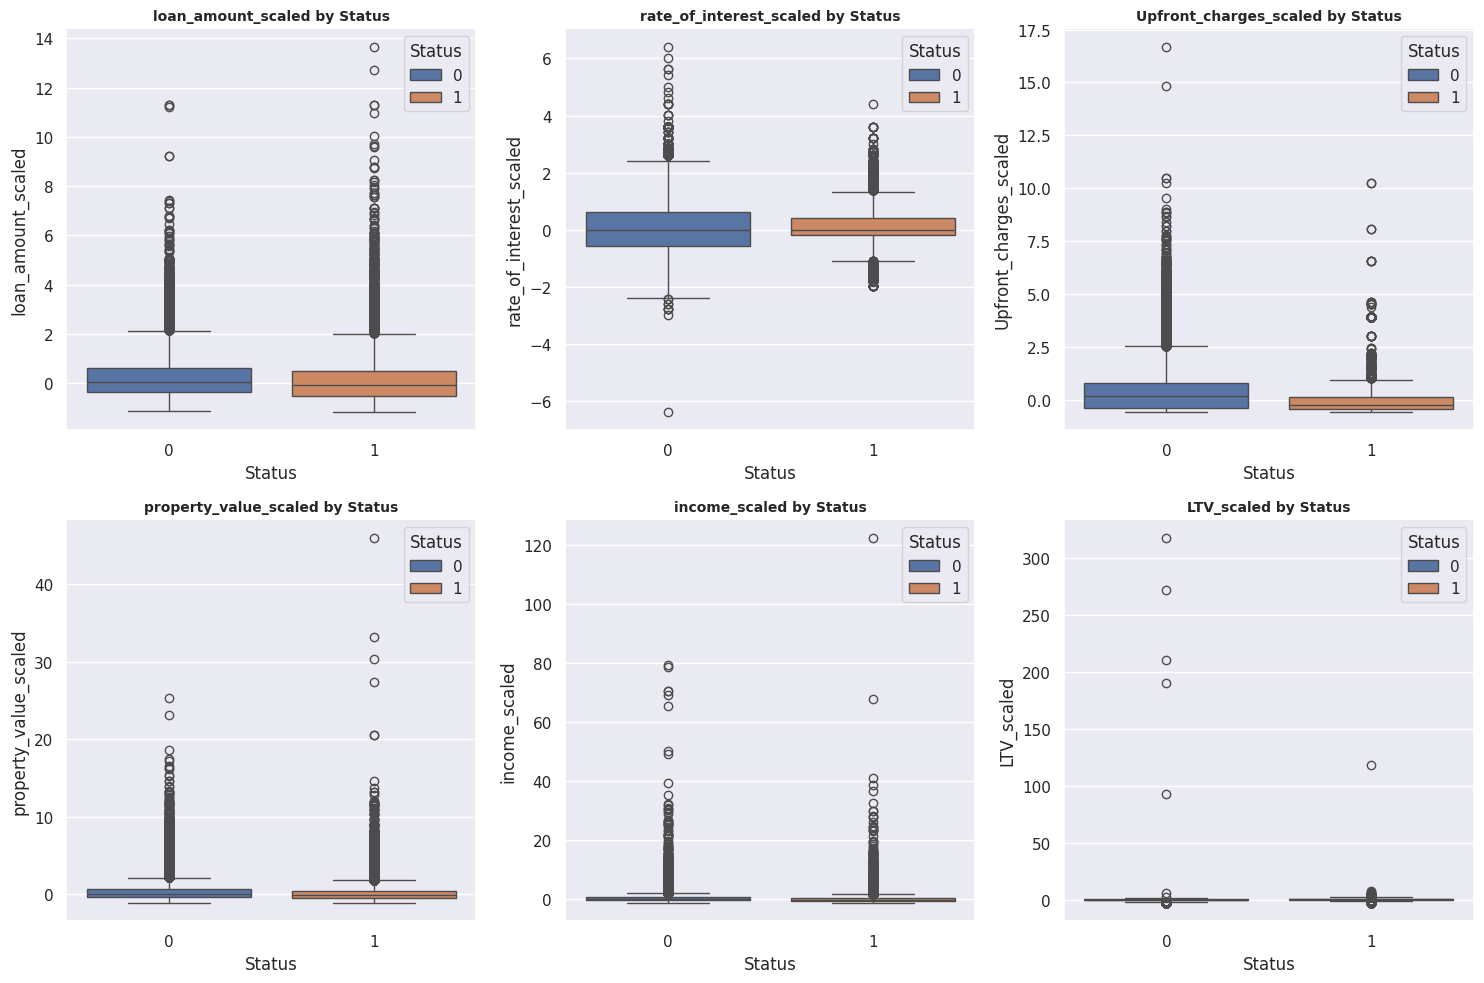

In [ ]:
plot_boxplots_by_status(loan_transformed_df, ['loan_amount_scaled', 'rate_of_interest_scaled', 'Upfront_charges_scaled', 'property_value_scaled', 'income_scaled', 'LTV_scaled'])

**Observation:**

The data is scaled but the outliers are not yet removed.


## **Outliers removal**

In [10]:
# Calculate IQR
Q1 = loan_transformed_df[['loan_amount_scaled', 'rate_of_interest_scaled', 'Upfront_charges_scaled', 'property_value_scaled', 'income_scaled', 'LTV_scaled']].quantile(0.25)
Q3 = loan_transformed_df[['loan_amount_scaled', 'rate_of_interest_scaled', 'Upfront_charges_scaled', 'property_value_scaled', 'income_scaled', 'LTV_scaled']].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
Q1 - 1.5 * IQR

,0
loan_amount_scaled,-1.916667
rate_of_interest_scaled,-1.884
Upfront_charges_scaled,-1.923193
property_value_scaled,-1.9
income_scaled,-1.910256
LTV_scaled,-2.051447


In [ ]:
Q3 + 1.5 * IQR

,0
loan_amount_scaled,2.083333
rate_of_interest_scaled,2.116
Upfront_charges_scaled,2.076807
property_value_scaled,2.1
income_scaled,2.089744
LTV_scaled,1.948553


In [11]:
# Remove outliers
outliers_clnd_df = loan_transformed_df[~((loan_transformed_df[['loan_amount_scaled', 'rate_of_interest_scaled', 'Upfront_charges_scaled', 'property_value_scaled', 'income_scaled', 'LTV_scaled']] < (Q1 - 1.5 * IQR)) | (loan_transformed_df[['loan_amount_scaled', 'rate_of_interest_scaled', 'Upfront_charges_scaled', 'property_value_scaled', 'income_scaled', 'LTV_scaled']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
loan_transformed_df.shape

(148668, 18)

In [ ]:
outliers_clnd_df.shape

(128459, 18)

In [ ]:
print("The percentage of overall outliers data is ", round(100 - outliers_clnd_df.shape[0]/loan_transformed_df.shape[0] * 100, 2))

The percentage of overall outliers data is  13.59


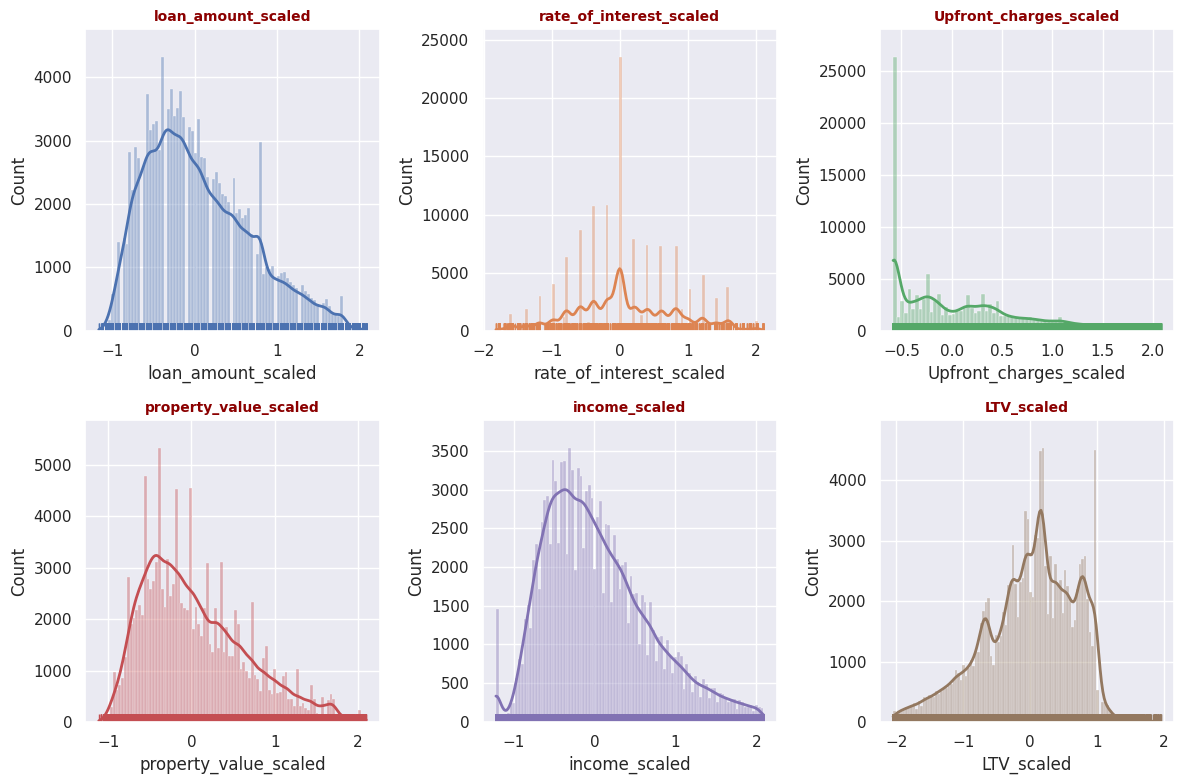

In [ ]:
plot_numeric_distributions(outliers_clnd_df, ['loan_amount_scaled', 'rate_of_interest_scaled', 'Upfront_charges_scaled', 'property_value_scaled', 'income_scaled', 'LTV_scaled'])

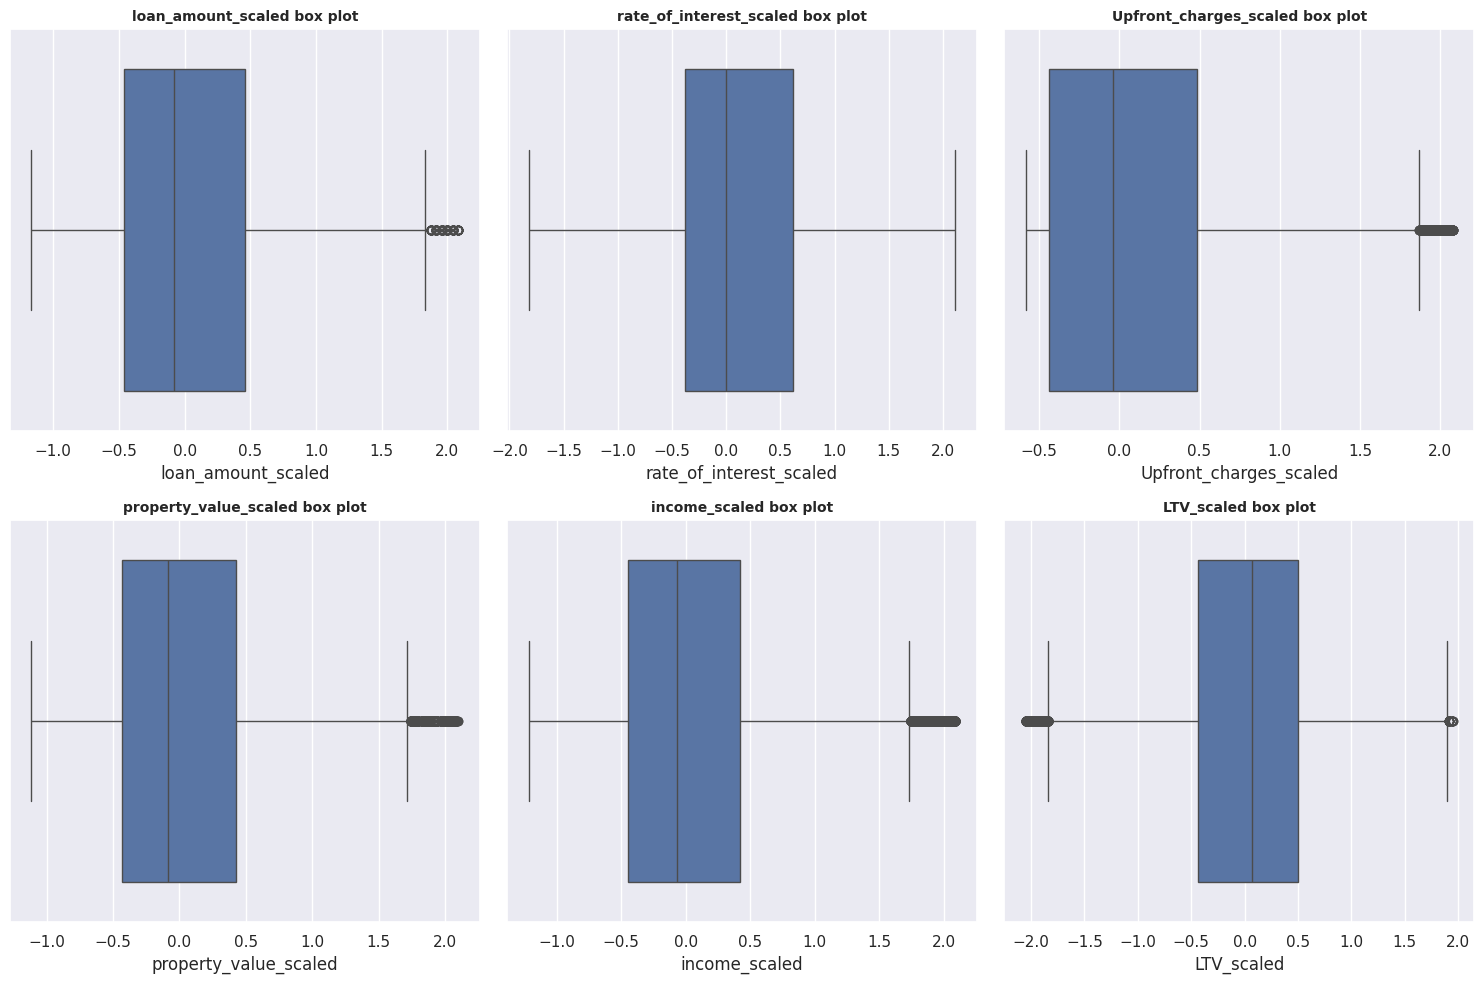

In [ ]:
plot_boxplots(outliers_clnd_df, ['loan_amount_scaled', 'rate_of_interest_scaled', 'Upfront_charges_scaled', 'property_value_scaled', 'income_scaled', 'LTV_scaled'])

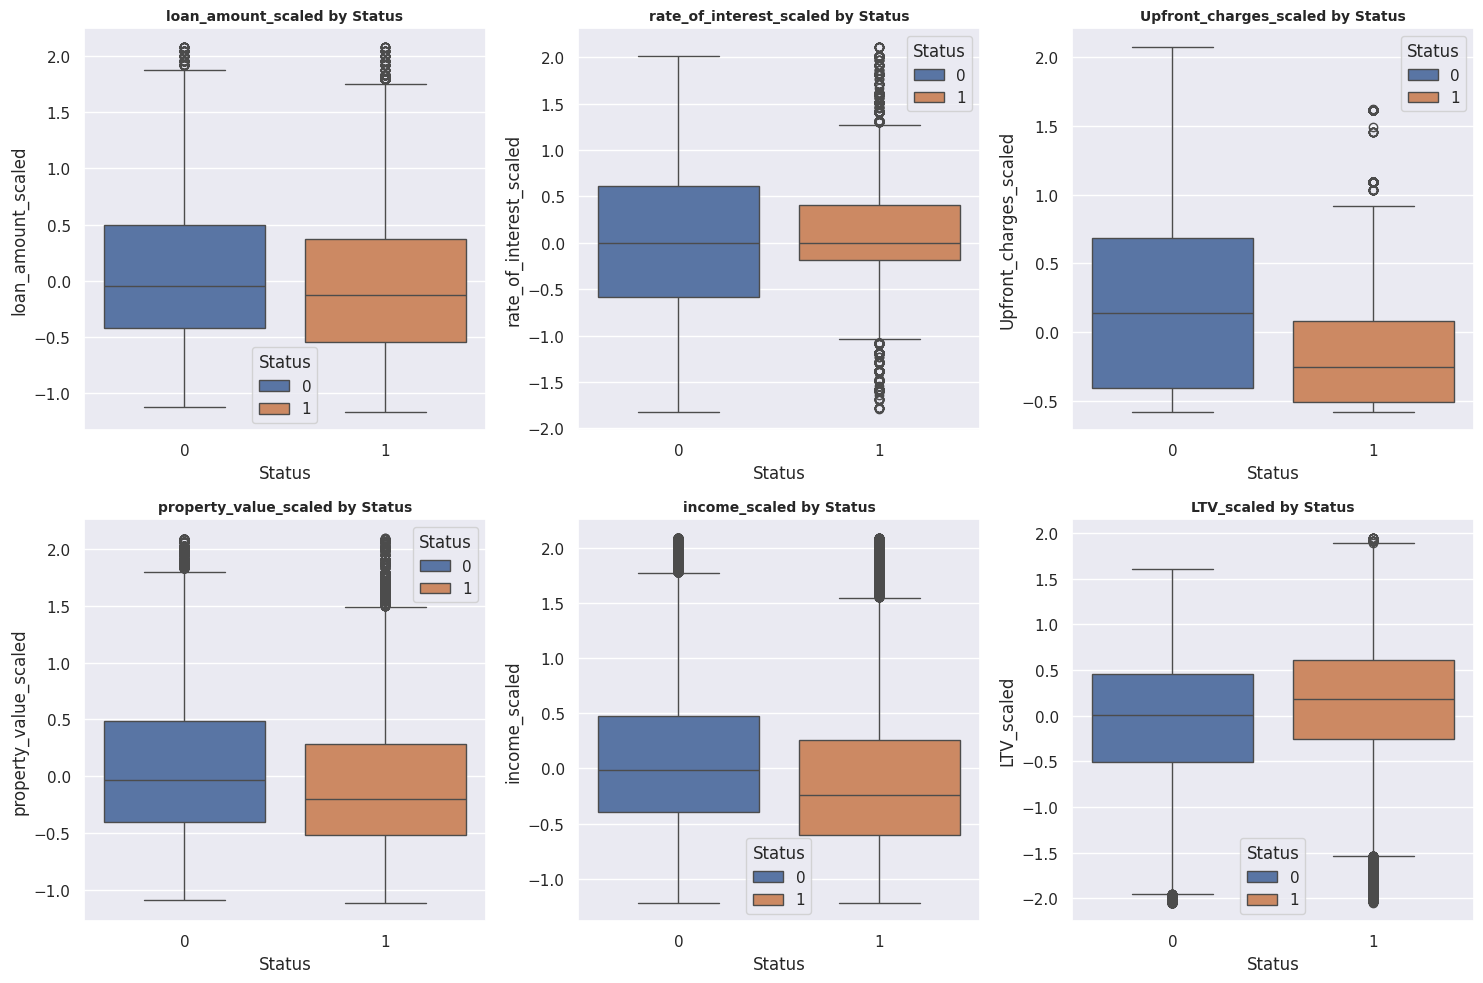

In [ ]:
plot_boxplots_by_status(outliers_clnd_df, ['loan_amount_scaled', 'rate_of_interest_scaled', 'Upfront_charges_scaled', 'property_value_scaled', 'income_scaled', 'LTV_scaled'])

**Observation:**

Histogram plots are looking better and the box plots are still showing the presence of near by outliers and not too far away. We can move forward without removing those outliers.

## **Distribution of quantitative variables with respect to their normal distribution**

In [ ]:
from scipy.stats import norm

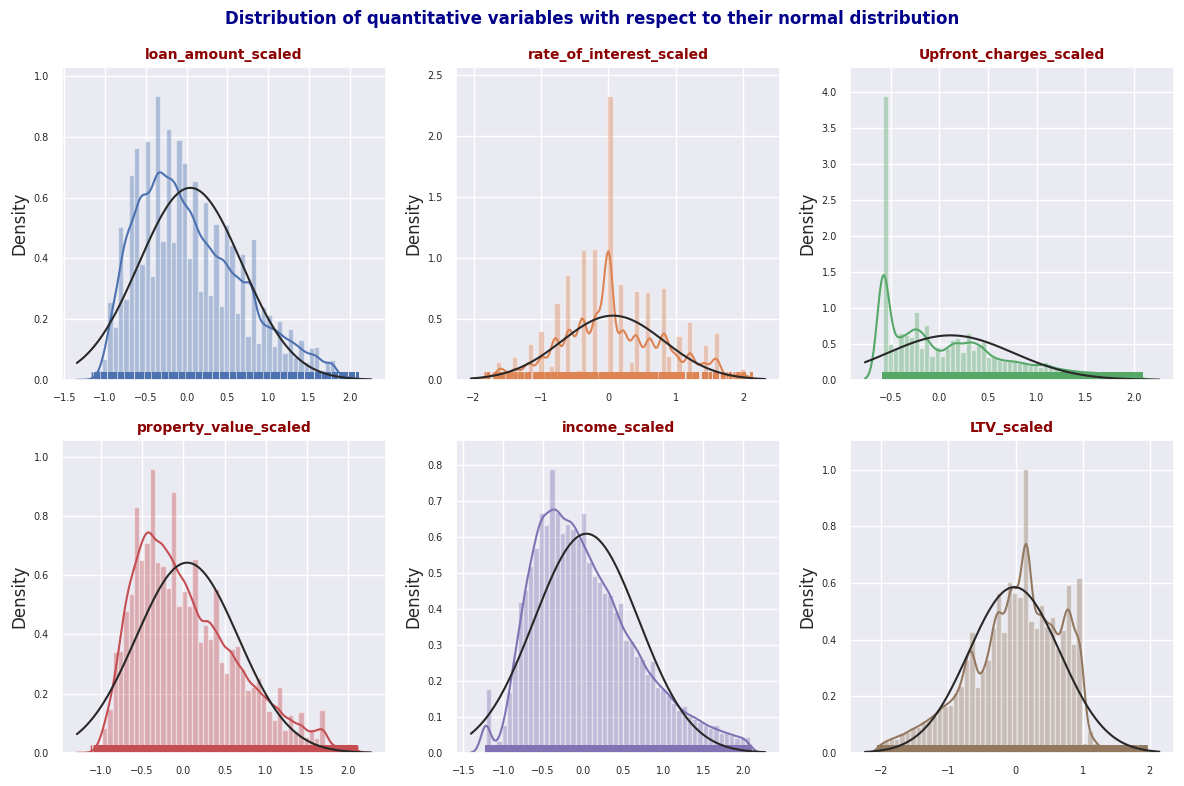

In [ ]:
# Let's visualize the distribution of quantitative variables with respect to their normal distribution.
sns.set_style("darkgrid")
fig,axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12,8))
axes = axes.flat

for i,col in enumerate(['loan_amount_scaled', 'rate_of_interest_scaled', 'Upfront_charges_scaled', 'property_value_scaled', 'income_scaled', 'LTV_scaled']):
  sns.distplot(outliers_clnd_df[col],
               fit = norm,
               rug = True,
               color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
               ax = axes[i])

  axes[i].set_xlabel("")
  axes[i].set_title(f"{col}", fontsize = 10, fontweight = "bold", color = "darkred")
  axes[i].tick_params(labelsize = 7)

fig.suptitle("Distribution of quantitative variables with respect to their normal distribution", fontsize = 12, fontweight = "bold", color = "darkblue")
fig.tight_layout()
fig.show()

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

In [ ]:
# Let's check with a 95% confidence level if the variables come from a normal distribution.
# We will use shapiro test.
for col in ['loan_amount_scaled', 'rate_of_interest_scaled', 'Upfront_charges_scaled', 'property_value_scaled', 'income_scaled', 'LTV_scaled']:
  p_value = shapiro(outliers_clnd_df[col])[1]
  result = 'No Normal Distribution' if p_value < 0.05 else 'Normal Distribution'
  print(f'* {col}: p-value = {p_value} => {result}')

* loan_amount_scaled: p-value = 4.3470779416275215e-93 => No Normal Distribution
* rate_of_interest_scaled: p-value = 7.629171974175543e-70 => No Normal Distribution
* Upfront_charges_scaled: p-value = 6.196234576781424e-117 => No Normal Distribution
* property_value_scaled: p-value = 4.353560534605727e-99 => No Normal Distribution
* income_scaled: p-value = 4.389027706995818e-93 => No Normal Distribution
* LTV_scaled: p-value = 1.9985699346514394e-83 => No Normal Distribution


In [ ]:
# Now let's check your skewness and kurtosis of each numerical variable.

for col in ['loan_amount_scaled', 'rate_of_interest_scaled', 'Upfront_charges_scaled', 'property_value_scaled', 'income_scaled', 'LTV_scaled']:
  print(f"* {col}:")
  print("Skewness: %f" % outliers_clnd_df[col].skew())
  print("Kurtosis: %f" % outliers_clnd_df[col].kurt())
  print("=================================")

* loan_amount_scaled:
Skewness: 0.639602
Kurtosis: -0.194966
* rate_of_interest_scaled:
Skewness: 0.169248
Kurtosis: -0.203145
* Upfront_charges_scaled:
Skewness: 0.861933
Kurtosis: -0.029300
* property_value_scaled:
Skewness: 0.766133
Kurtosis: 0.046964
* income_scaled:
Skewness: 0.724931
Kurtosis: 0.166788
* LTV_scaled:
Skewness: -0.539304
Kurtosis: -0.125382


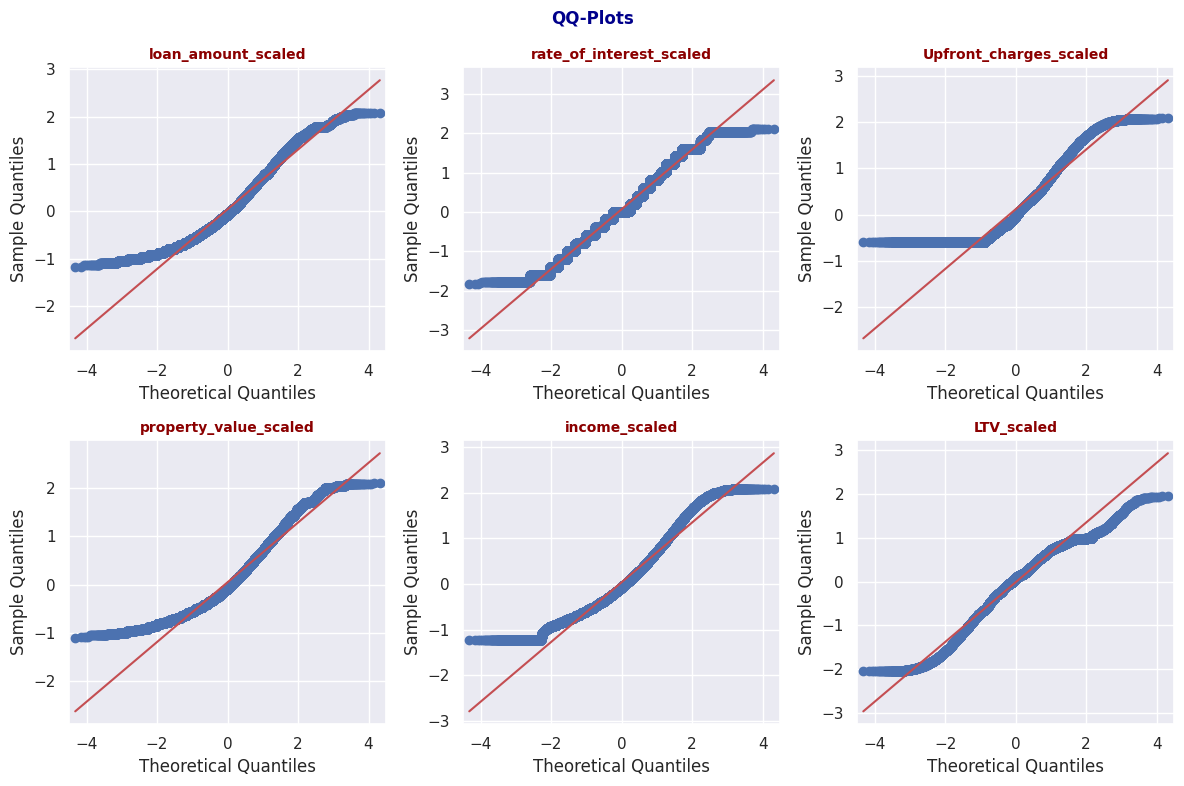

In [ ]:
# Let's visualize the qq plot of each variable to check if they come from a normal distribution.
sns.set_style("darkgrid")
fig,ax = plt.subplots(nrows = 2, ncols = 3, figsize = (12,8))
ax = ax.flat

for i, col in enumerate(['loan_amount_scaled', 'rate_of_interest_scaled', 'Upfront_charges_scaled', 'property_value_scaled', 'income_scaled', 'LTV_scaled']):
  qqplot(outliers_clnd_df[col], line = 's', ax = ax[i])
  ax[i].set_title(f'{col}', fontsize = 10, fontweight = 'bold', color = 'darkred')

fig.suptitle('QQ-Plots', fontsize = 12, fontweight = 'bold', color = 'darkblue')
fig.tight_layout()
fig.show()

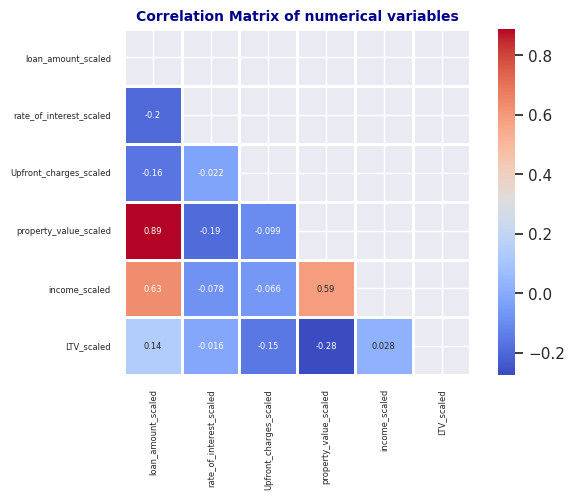

In [12]:
# We generate a correlation matrix between each pair of variables, we will use the Spearman correlation since the variables do not come from a normal distribution.
sns.set_style("darkgrid")
corr_matrix = outliers_clnd_df[['loan_amount_scaled', 'rate_of_interest_scaled', 'Upfront_charges_scaled', 'property_value_scaled', 'income_scaled', 'LTV_scaled']].corr(method = "spearman")
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

fig,ax = plt.subplots(figsize = (7,4.5))

sns.heatmap(corr_matrix,
            cmap = "coolwarm",
            annot = True,
            annot_kws = {"fontsize":6},
            square = True,
            mask = mask,
            linewidths = 1.0,
            linecolor = "white",
            ax = ax)
ax.tick_params(labelsize = 6)
ax.set_title('Correlation Matrix of numerical variables', fontsize = 10, fontweight = 'bold', color = 'darkblue')
fig.show()

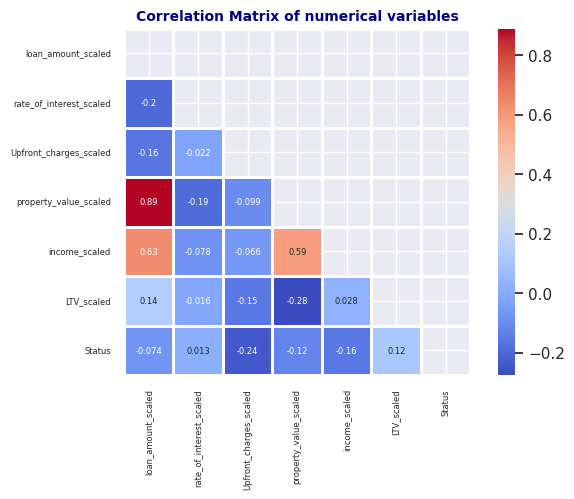

In [13]:
# We generate a correlation matrix between each pair of variables, we will use the Spearman correlation since the variables do not come from a normal distribution.
sns.set_style("darkgrid")
corr_matrix = outliers_clnd_df[['loan_amount_scaled', 'rate_of_interest_scaled', 'Upfront_charges_scaled', 'property_value_scaled', 'income_scaled', 'LTV_scaled', 'Status']].corr(method = "spearman")
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

fig,ax = plt.subplots(figsize = (7,4.5))

sns.heatmap(corr_matrix,
            cmap = "coolwarm",
            annot = True,
            annot_kws = {"fontsize":6},
            square = True,
            mask = mask,
            linewidths = 1.0,
            linecolor = "white",
            ax = ax)
ax.tick_params(labelsize = 6)
ax.set_title('Correlation Matrix of numerical variables', fontsize = 10, fontweight = 'bold', color = 'darkblue')
fig.show()

In [ ]:
# Function to categorize credit scores
def categorize_score(bureau, score):
    if bureau == 'CIB':
        if score <= 549:
            return 'Poor'
        elif score <= 649:
            return 'Fair'
        elif score <= 749:
            return 'Good'
        else:
            return 'Excellent'
    elif bureau == 'CRIF':
        if score <= 577:
            return 'Poor'
        elif score <= 644:
            return 'Fair'
        elif score <= 693:
            return 'Good'
        else:
            return 'Excellent'
    elif bureau == 'EQUI':
        if score <= 559:
            return 'Poor'
        elif score <= 659:
            return 'Fair'
        elif score <= 724:
            return 'Good'
        elif score <= 759:
            return 'Very Good'
        else:
            return 'Excellent'
    elif bureau == 'EXP':
        if score <= 579:
            return 'Poor'
        elif score <= 669:
            return 'Fair'
        elif score <= 739:
            return 'Good'
        elif score <= 799:
            return 'Very Good'
        else:
            return 'Excellent'

In [ ]:
# Apply the function to create a new column
outliers_clnd_df['category'] = outliers_clnd_df.apply(lambda row: categorize_score(row['credit_type'], row['Credit_Score']), axis=1)

<ipython-input-57-26225996e5c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_clnd_df['category'] = outliers_clnd_df.apply(lambda row: categorize_score(row['credit_type'], row['Credit_Score']), axis=1)


In [ ]:
# Define a fixed color palette
palette = {
    'CIB': '#1f77b4',
    'CRIF': '#ff7f0e',
    'EQUI': '#2ca02c',
    'EXP': '#d62728'
}

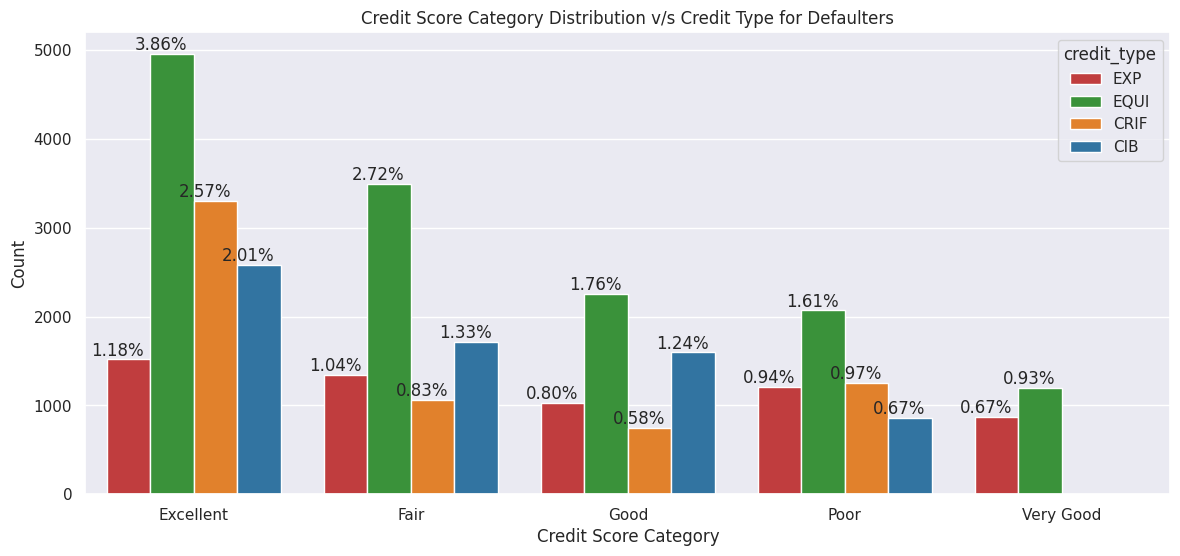

In [ ]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=outliers_clnd_df[outliers_clnd_df['Status'] == 1], x='category', order=outliers_clnd_df['category'].value_counts().index, hue='credit_type', palette=palette, dodge=True)
# Adding labels and title
plt.xlabel('Credit Score Category')
plt.ylabel('Count')
plt.title('Credit Score Category Distribution v/s Credit Type for Defaulters')
# Calculate the percentages
total = len(outliers_clnd_df['Status'])
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than 0
        percentage = '{:.2f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

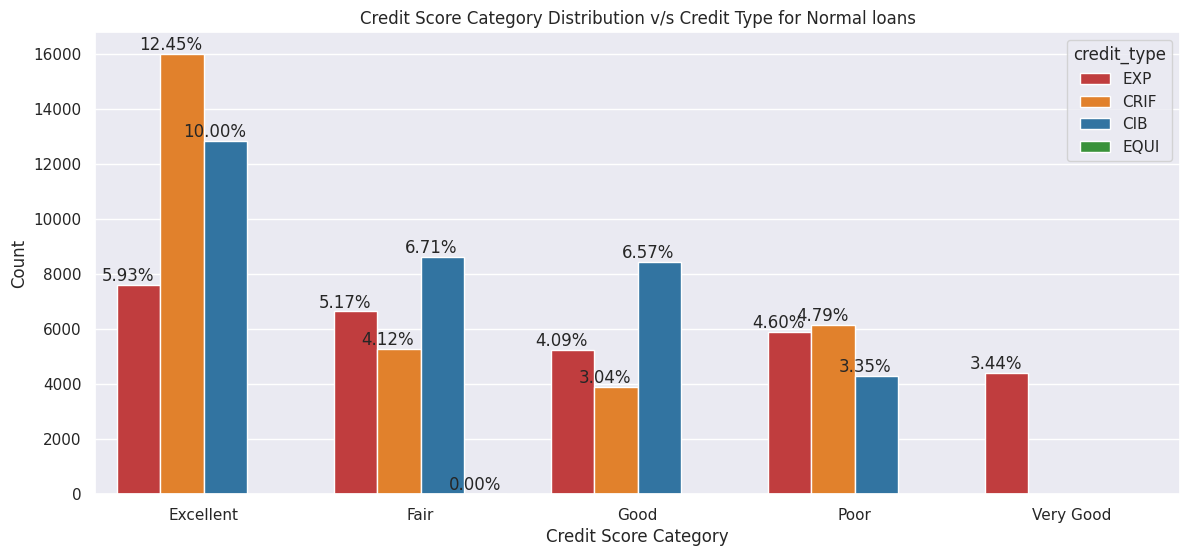

In [ ]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=outliers_clnd_df[outliers_clnd_df['Status'] == 0], x='category', order=outliers_clnd_df['category'].value_counts().index, hue='credit_type', palette=palette, dodge=True)
# Adding labels and title
plt.xlabel('Credit Score Category')
plt.ylabel('Count')
plt.title('Credit Score Category Distribution v/s Credit Type for Normal loans')
# Calculate the percentages
total = len(outliers_clnd_df['Status'])
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than 0
        percentage = '{:.2f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

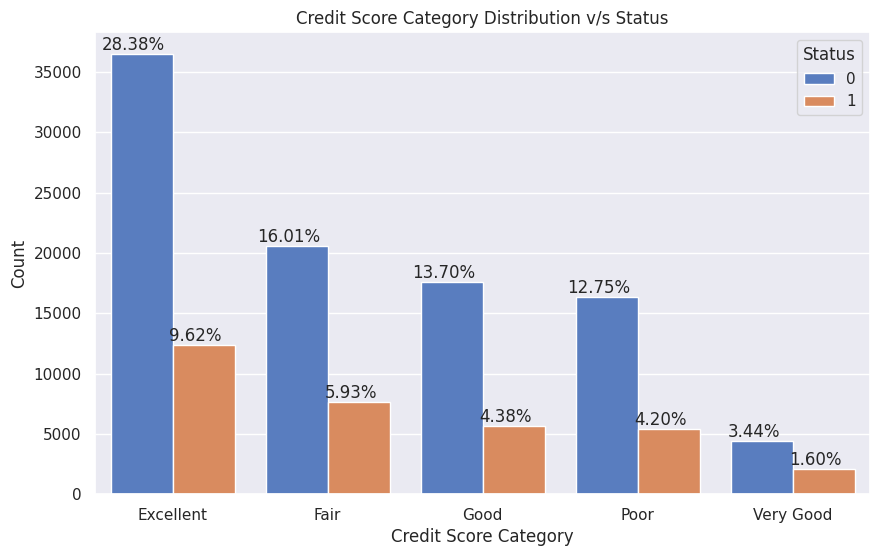

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=outliers_clnd_df, x='category', order=outliers_clnd_df['category'].value_counts().index, hue='Status', palette='muted')
# Adding labels and title
plt.xlabel('Credit Score Category')
plt.ylabel('Count')
plt.title('Credit Score Category Distribution v/s Status')
# Calculate the percentages
total = len(outliers_clnd_df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than 0
        percentage = '{:.2f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

In [ ]:
outliers_clnd_df.to_csv("loan_outlier_cleaned_file.csv")